The following Notebook has been used for step by step debugging

In [1]:
import src.unconstrained_min as um
import src.utils as utils
import tests.examples as examples
import numpy as np

1. TEST THE EXAMPLES 

In [2]:
x = np.array([1.0, 2.0])

#test quad_circle
f, grad, hess = examples.quad_circle(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)



Function value: 5.0
Gradient: [2. 4.]
Hessian:
 [[2. 0.]
 [0. 2.]]


In [3]:
#test quad_elipse
print("Quad ellipse with x = [1.0, 2.0]")  
f, grad, hess = examples.quad_ellipse(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)

#test quad_rotated_ellipse
print("Quad rotated ellipse with x = [1.0, 2.0]")
f, grad, hess = examples.quad_rotated_ellipse(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)

#test rosenbrock
print("Rosenbrock with x = [1.0, 2.0]")
f, grad, hess = examples.rosenbrock(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)

#test linear 
print("Linear with x = [1.0, 2.0]")
f, grad, hess = examples.linear(x, need_hessian=False)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)

#test smooth_triangle
print("Smooth triangle with x = [1.0, 2.0]")
f, grad, hess = examples.smooth_triangle(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)




Quad ellipse with x = [1.0, 2.0]
Function value: 401.0
Gradient: [  2. 400.]
Hessian:
 [[  2   0]
 [  0 200]]
Quad rotated ellipse with x = [1.0, 2.0]
Function value: 6.776970050681143
Gradient: [-20.97302995  17.26348503]
Hessian:
 [[150.5        -85.73651497]
 [-85.73651497  51.5       ]]
Rosenbrock with x = [1.0, 2.0]
Function value: 100.0
Gradient: [-400.  200.]
Hessian:
 [[ 402. -400.]
 [-400.  200.]]
Linear with x = [1.0, 2.0]
Function value: 247.0
Gradient: [  1. 123.]
Hessian:
 None
Smooth triangle with x = [1.0, 2.0]
Function value: 992.6136834352898
Gradient: [ 991.94794127 2976.80585658]
Hessian:
 [[ 992.61368344 2976.80585658]
 [2976.80585658 8930.52731116]]


2.TEST THE MINIMIZATION

In [4]:
from tests.examples import quad_circle, quad_ellipse, quad_rotated_ellipse, rosenbrock, linear, smooth_triangle

In [5]:
functions = [
    ("Quad Circle", quad_circle, [1.0, 1.0]),
    ("Quad Ellipse", quad_ellipse, [1.0, 1.0]),
    ("Quad Rotated Ellipse", quad_rotated_ellipse, [1.0, 1.0]),
    ("Rosenbrock", rosenbrock, [-1.0, 2.0]),
    ("Linear", linear, [1.0, 1.0]),
    ("Smooth Triangle", smooth_triangle, [1.0, 1.0])
]

results = []
for name, func, x0 in functions[3:]:
    max_iter = 10000 if name == "Rosenbrock" else 100
    print(f"\n🔍 Testing Gradient Descent on: {name} with x0 = {x0}")
    x_final, f_final, success, x_path, f_path = um.minimize(f=func, x0=x0, method='GD',
                                                                 obj_tol=1e-12, param_tol=1e-8, max_iter=max_iter)
    print(f"Final x: {x_final}")
    print(f"Final function value: {f_final}")
    print(f"Success: {success}")
    print(f"Iterations: {len(x_path)-1}")
    results.append((name, x_final, f_final, success, len(x_path)-1))
                                                             



🔍 Testing Gradient Descent on: Rosenbrock with x0 = [-1.0, 2.0]


Iter 7751: x = [0.99989437 0.99978771], f(x) = 1.1267173493005898e-08
Final x: [0.99989437 0.99978771]
Final function value: 1.1267173493005898e-08
Success: True
Iterations: 7750

🔍 Testing Gradient Descent on: Linear with x0 = [1.0, 1.0]
Iter 100: x = [   -99. -12299.], f(x) = -1512876.0
Final x: [   -99. -12299.]
Final function value: -1512876.0
Success: False
Iterations: 100

🔍 Testing Gradient Descent on: Smooth Triangle with x0 = [1.0, 1.0]
Iter 29: x = [-3.46572886e-01 -9.76799665e-07], f(x) = 2.559266696664345
Final x: [-3.46572886e-01 -9.76799665e-07]
Final function value: 2.559266696664345
Success: True
Iterations: 28


In [6]:
functions = [
    ("Quad Circle", quad_circle, [1.0, 1.0]),
    ("Quad Ellipse", quad_ellipse, [1.0, 1.0]),
    ("Quad Rotated Ellipse", quad_rotated_ellipse, [1.0, 1.0]),
    ("Rosenbrock", rosenbrock, [-1.0, 2.0]),
    #("Linear", linear, [1.0, 1.0]),
    ("Smooth Triangle", smooth_triangle, [1.0, 1.0])
]
results = []
for name, func, x0 in functions[3:]:
    print(f"\n🔍 Testing Gradient Descent on: {name} with x0 = {x0}")
    x_final, f_final, success, x_path, f_path = um.minimize(f=func, x0=x0, method='NT',
                                                                 obj_tol=1e-12, param_tol=1e-8, max_iter=100)
    print(f"Final x: {x_final}")
    print(f"Final function value: {f_final}")
    print(f"Success: {success}")
    print(f"Iterations: {len(x_path)-1}")
    results.append((name, x_final, f_final, success, len(x_path)-1))


🔍 Testing Gradient Descent on: Rosenbrock with x0 = [-1.0, 2.0]
Iter 21: x = [1. 1.], f(x) = 5.4357446750385345e-30
Final x: [1. 1.]
Final function value: 5.4357446750385345e-30
Success: True
Iterations: 20

🔍 Testing Gradient Descent on: Smooth Triangle with x0 = [1.0, 1.0]
Iter 9: x = [-3.46573590e-01 -7.26375117e-18], f(x) = 2.5592666966582156
Final x: [-3.46573590e-01 -7.26375117e-18]
Final function value: 2.5592666966582156
Success: True
Iterations: 8


GD unit tests

In [7]:
# Test GD on quad_circle
res = um.minimize(quad_circle, [1.0, 1.0], method='GD')
assert res[2] == True, "GD on quad_circle did not converge"
assert np.allclose(res[0], [0.0, 0.0], atol=1e-4), "GD on quad_circle did not reach minimum"

# Test GD on smooth_triangle
res = um.minimize(smooth_triangle, [1.0, 1.0], method='GD')
assert res[2] == True, "GD on smooth_triangle did not converge"
assert res[1] > 0, "GD on smooth_triangle gave non-positive objective"

# Test GD on rosenbrock (10,000 iterations allowed)
res = um.minimize(rosenbrock, [-1.0, 2.0], method='GD', max_iter=10000)
assert res[2] == True, "GD on rosenbrock did not converge"
assert res[1] < 1.0, "GD on rosenbrock did not reduce function value enough"


Iter 2: x = [0. 0.], f(x) = 0.0
Iter 29: x = [-3.46572886e-01 -9.76799665e-07], f(x) = 2.559266696664345


Iter 7751: x = [0.99989437 0.99978771], f(x) = 1.1267173493005898e-08


In [8]:
# Test NT on quad_ellipse
res = um.minimize(quad_ellipse, [1.0, 1.0], method='NT')
assert res[2] == True, "NT on quad_ellipse did not converge"
assert np.allclose(res[0], [0.0, 0.0], atol=1e-4), "NT on quad_ellipse did not reach minimum"

# Test NT on quad_rotated_ellipse
res = um.minimize(quad_rotated_ellipse, [1.0, 1.0], method='NT')
assert res[2] == True, "NT on rotated ellipse did not converge"
assert res[1] < 1e-6, "NT on rotated ellipse final function value too high"

# Test NT on rosenbrock
res = um.minimize(rosenbrock, [-1.0, 2.0], method='NT')
assert res[2] == True, "NT on rosenbrock did not converge"
assert res[1] < 1.0, "NT on rosenbrock final function value too high"


Iter 2: x = [0. 0.], f(x) = 0.0
Iter 2: x = [2.95822839e-31 4.93038066e-31], f(x) = 3.3985709951003985e-61
Iter 21: x = [1. 1.], f(x) = 5.4357446750385345e-30


In [9]:
from src.unconstrained_min import minimize
from src.utils import plot_contours_with_paths, plot_function_values

In [10]:
x0 = np.array([1.0, 1.0])
x0_ros = np.array([-1.0, 2.0])

Iter 2: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0


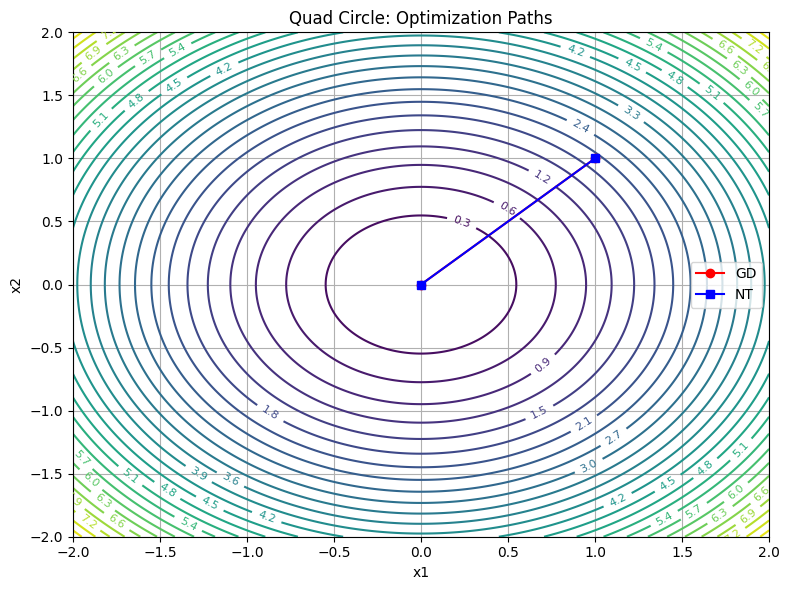

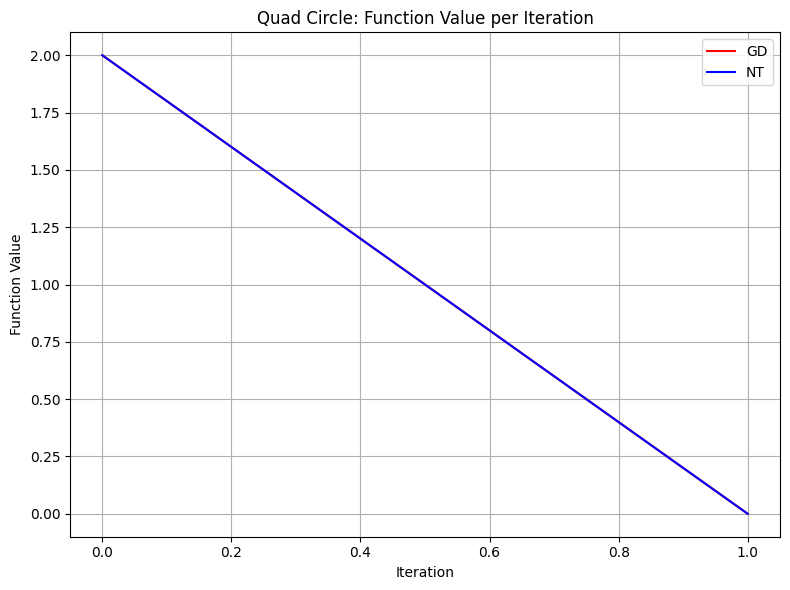

In [13]:
res_gd = minimize(quad_circle, x0, method='GD')
res_nt = minimize(quad_circle, x0, method='NT')

plot_contours_with_paths(
    f=quad_circle,
    xlim=(-2, 2),
    ylim=(-2, 2),
    paths=[res_gd[3], res_nt[3]],
    labels=["GD", "NT"],
    title="Quad Circle: Optimization Paths"
)

plot_function_values(
    f_paths=[res_gd[4], res_nt[4]],
    labels=["GD", "NT"],
    title="Quad Circle: Function Value per Iteration"
)

Iter 100: x = [0.11271997 0.0008856 ], f(x) = 0.012784220095399295
Iter 2: x = [0. 0.], f(x) = 0.0


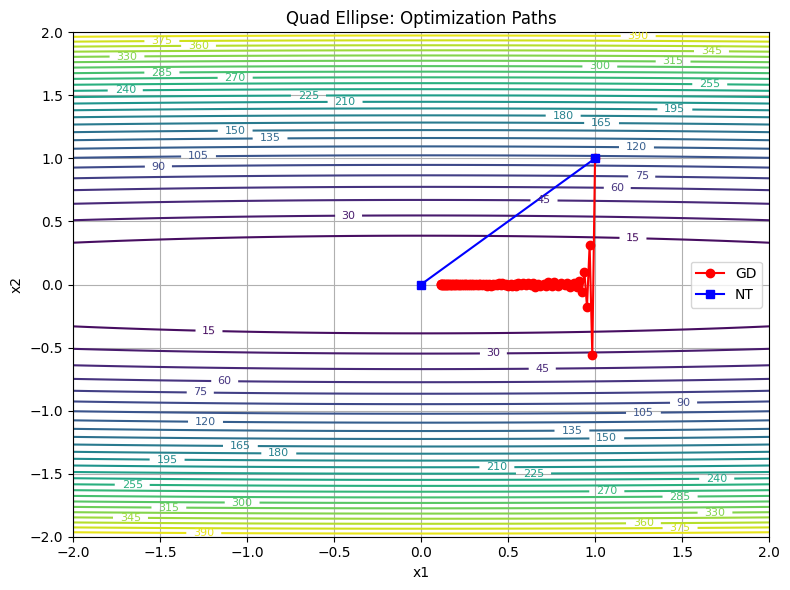

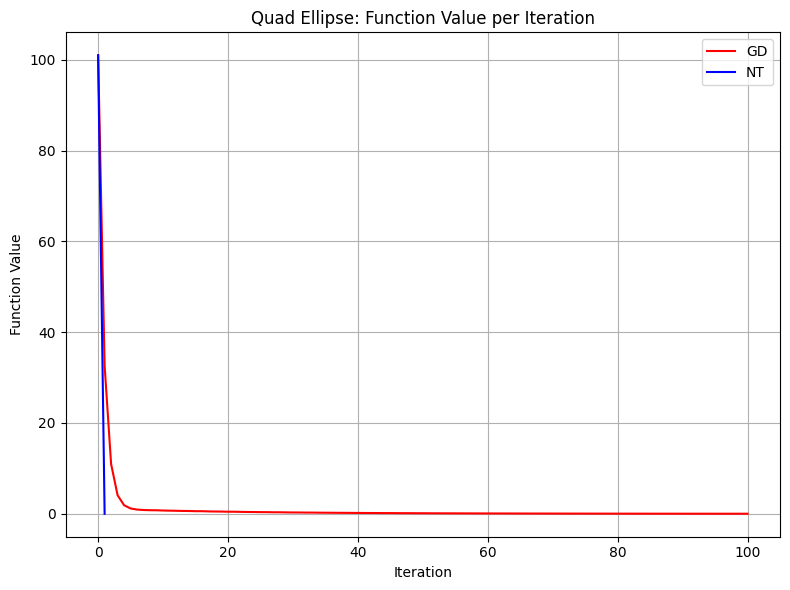

In [14]:
res_gd = minimize(quad_ellipse, x0, method='GD')
res_nt = minimize(quad_ellipse, x0, method='NT')

plot_contours_with_paths(quad_ellipse, (-2, 2), (-2, 2), [res_gd[3], res_nt[3]], ["GD", "NT"], "Quad Ellipse: Optimization Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Quad Ellipse: Function Value per Iteration")

Iter 100: x = [0.07682763 0.13062022], f(x) = 0.02311258419270041
Iter 2: x = [2.95822839e-31 4.93038066e-31], f(x) = 3.3985709951003985e-61


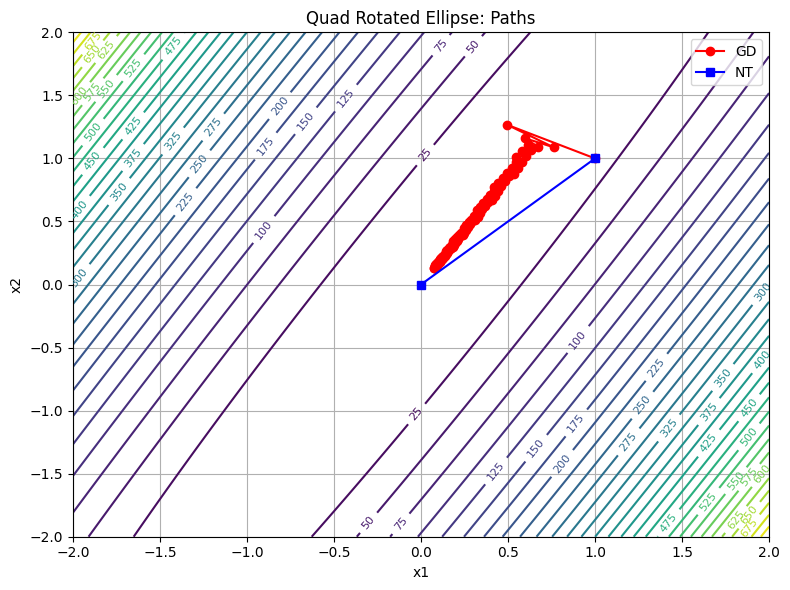

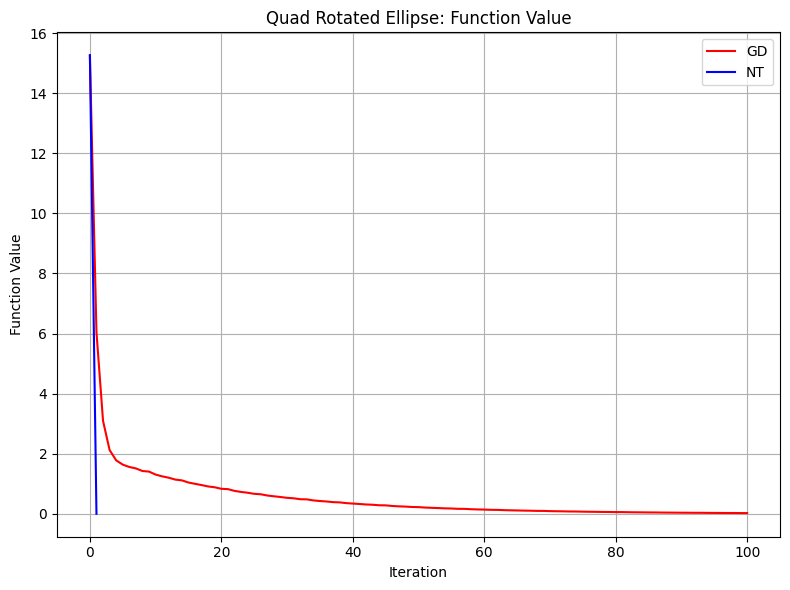

In [15]:
res_gd = minimize(quad_rotated_ellipse, x0, method='GD')
res_nt = minimize(quad_rotated_ellipse, x0, method='NT')

plot_contours_with_paths(quad_rotated_ellipse, (-2, 2), (-2, 2), [res_gd[3], res_nt[3]], ["GD", "NT"], "Quad Rotated Ellipse: Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Quad Rotated Ellipse: Function Value")

Iter 100: x = [0.93078365 0.86628392], f(x) = 0.004791455309235969
Iter 21: x = [1. 1.], f(x) = 5.4357446750385345e-30


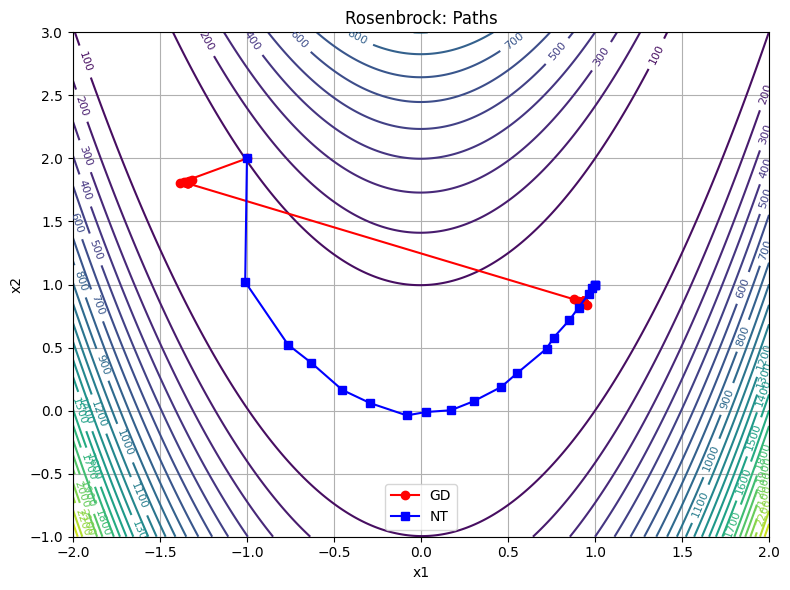

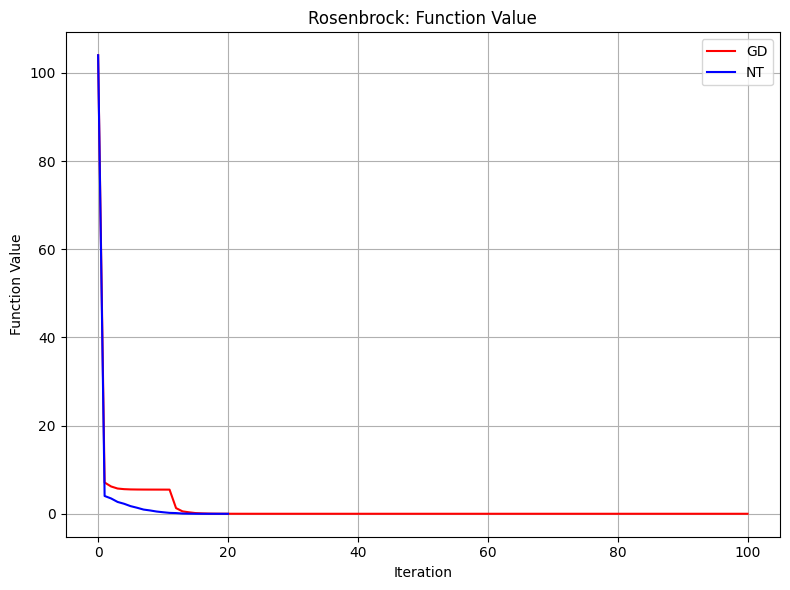

In [17]:
res_gd = minimize(rosenbrock, x0_ros, method='GD', max_iter=100)
res_nt = minimize(rosenbrock, x0_ros, method='NT')

plot_contours_with_paths(rosenbrock, (-2, 2), (-1, 3), [res_gd[3], res_nt[3]], ["GD", "NT"], "Rosenbrock: Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Rosenbrock: Function Value")

Iter 100: x = [   -99. -12299.], f(x) = -1512876.0
Iter 100: x = [   -99. -12299.], f(x) = -1512876.0


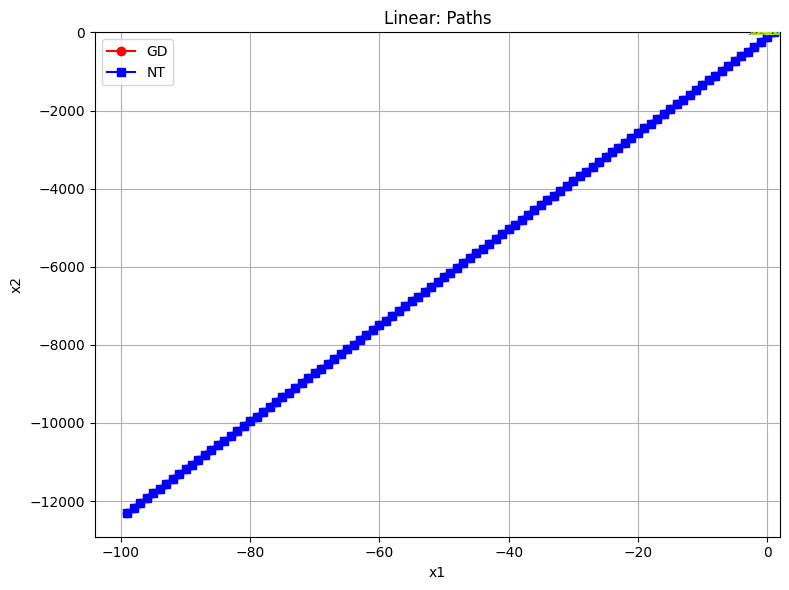

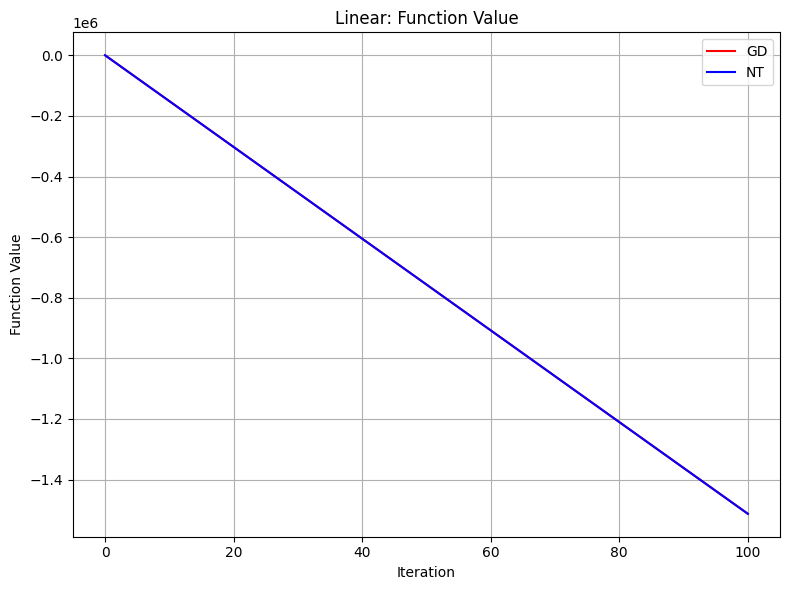

In [18]:
res_gd = minimize(linear, x0, method='GD')
res_nt = minimize(linear, x0, method='NT')

plot_contours_with_paths(linear, (-2, 2), (-2, 2), [res_gd[3], res_nt[3]], ["GD", "NT"], "Linear: Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Linear: Function Value")

Iter 29: x = [-3.46572886e-01 -9.76799665e-07], f(x) = 2.559266696664345
Iter 9: x = [-3.46573590e-01 -7.26375117e-18], f(x) = 2.5592666966582156


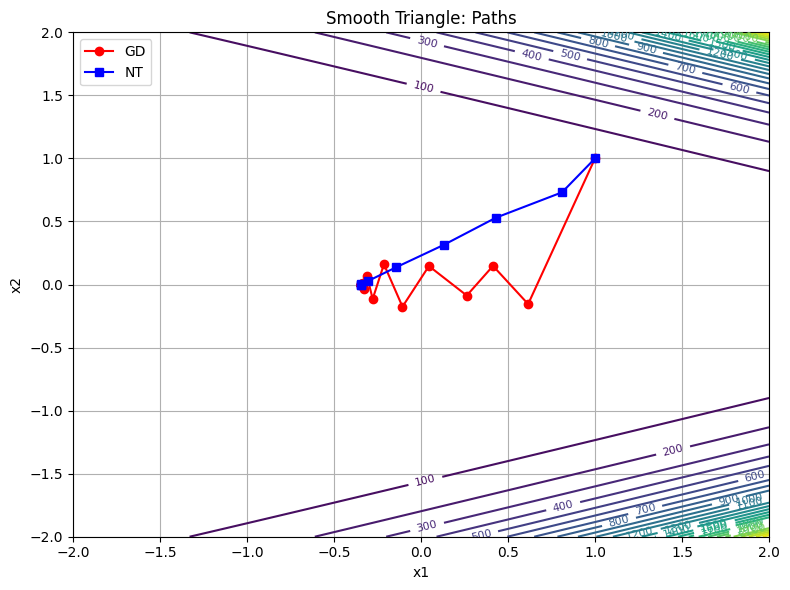

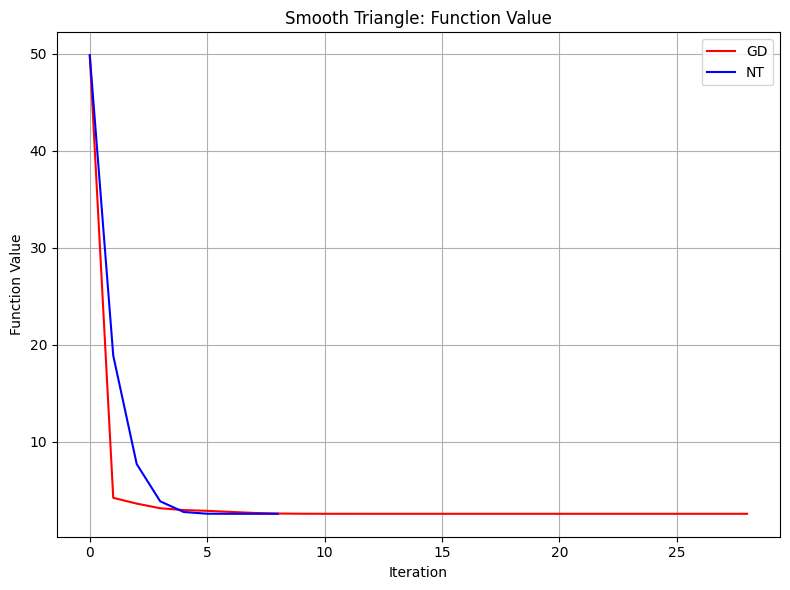

In [19]:
res_gd = minimize(smooth_triangle, x0, method='GD')
res_nt = minimize(smooth_triangle, x0, method='NT')

plot_contours_with_paths(smooth_triangle, (-2, 2), (-2, 2), [res_gd[3], res_nt[3]], ["GD", "NT"], "Smooth Triangle: Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Smooth Triangle: Function Value")

In [20]:
plot_settings = {
    "quad_circle": {
        "xlim": (-2, 2),
        "ylim": (-2, 2),
        "levels": 30  # auto-scaled
    },
    "quad_ellipse": {
        "xlim": (-2, 2),
        "ylim": (-2, 2),
        "levels": 30
    },
    "quad_rotated_ellipse": {
        "xlim": (-2, 2),
        "ylim": (-2, 2),
        "levels": 30
    },
    "rosenbrock": {
        "xlim": (-2, 2),
        "ylim": (-1, 3),
        "levels": np.logspace(0, 3.5, 30)  # good for steep sides
    },
    "linear": {
        "xlim": (-2, 2),
        "ylim": (-130, 2),
        "levels": np.linspace(-5000, 100, 30)
    },
    "smooth_triangle": {
        "xlim": (-2, 2),
        "ylim": (-2, 2),
        "levels": np.logspace(0, 4, 25)
    }
}


In [21]:
functions = {
    "quad_circle": quad_circle,
    "quad_ellipse": quad_ellipse,
    "quad_rotated_ellipse": quad_rotated_ellipse,
    "rosenbrock": rosenbrock,
    "linear": linear,
    "smooth_triangle": smooth_triangle
}

Iter 2: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0


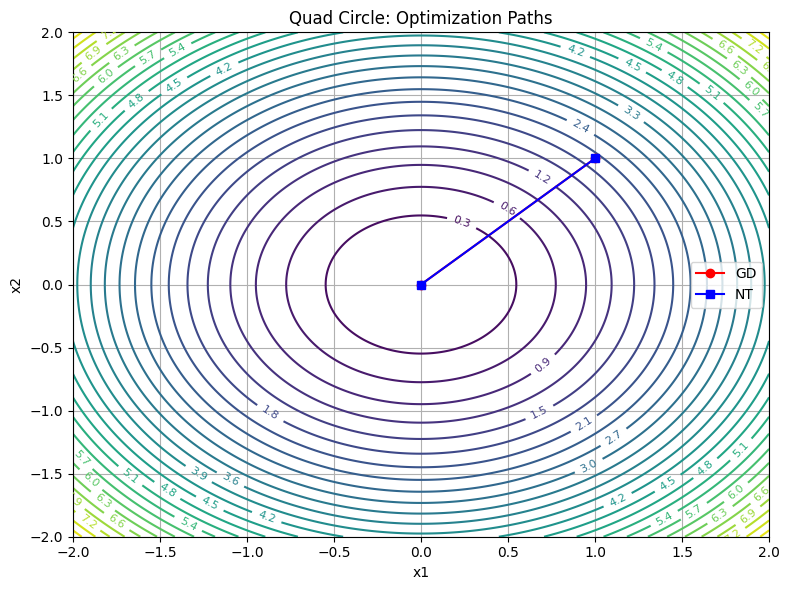

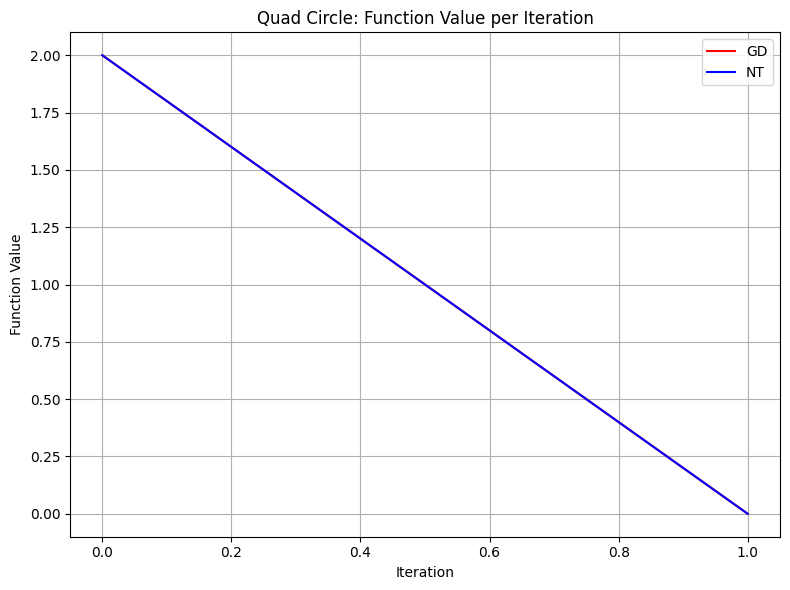

Iter 100: x = [0.11271997 0.0008856 ], f(x) = 0.012784220095399295
Iter 2: x = [0. 0.], f(x) = 0.0


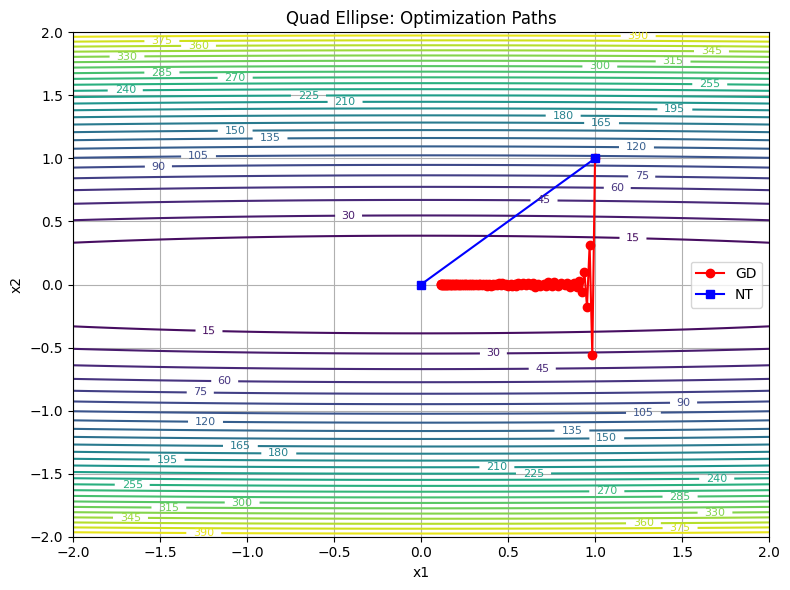

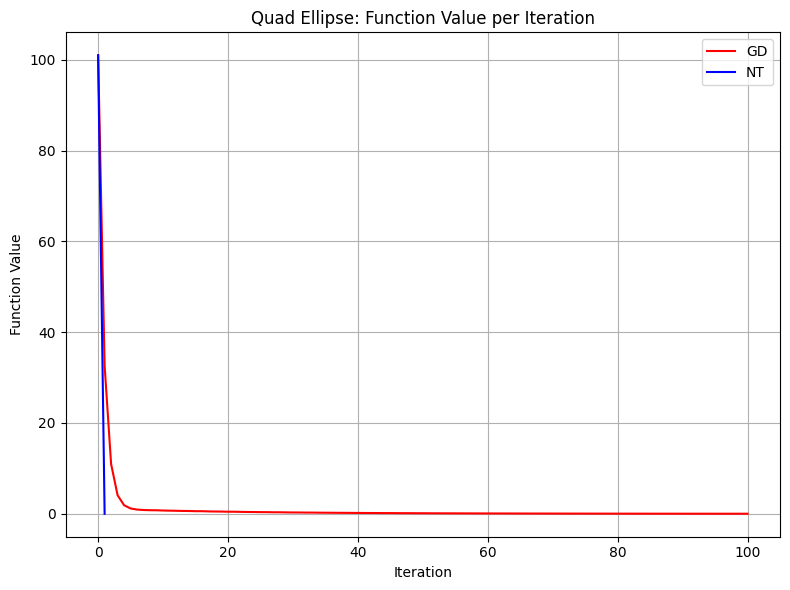

Iter 100: x = [0.07682763 0.13062022], f(x) = 0.02311258419270041
Iter 2: x = [2.95822839e-31 4.93038066e-31], f(x) = 3.3985709951003985e-61


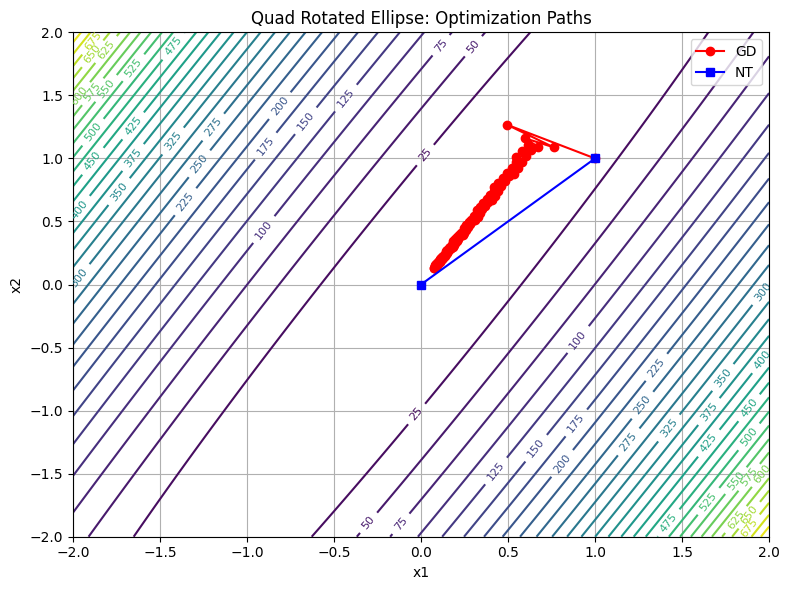

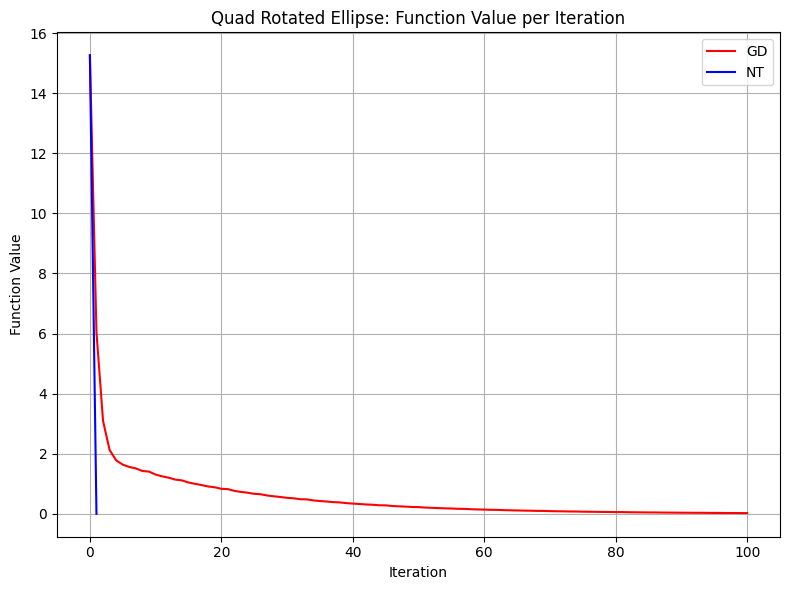

Iter 7751: x = [0.99989437 0.99978771], f(x) = 1.1267173493005898e-08
Iter 21: x = [1. 1.], f(x) = 5.4357446750385345e-30


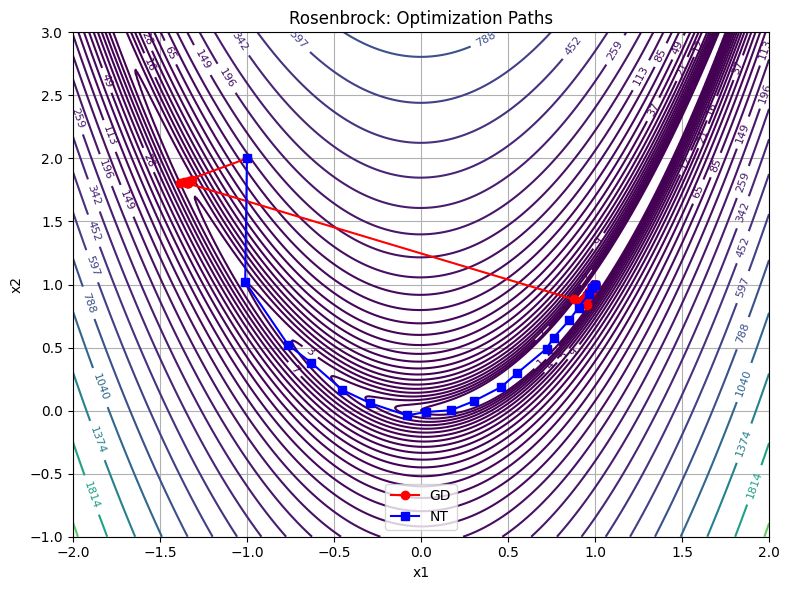

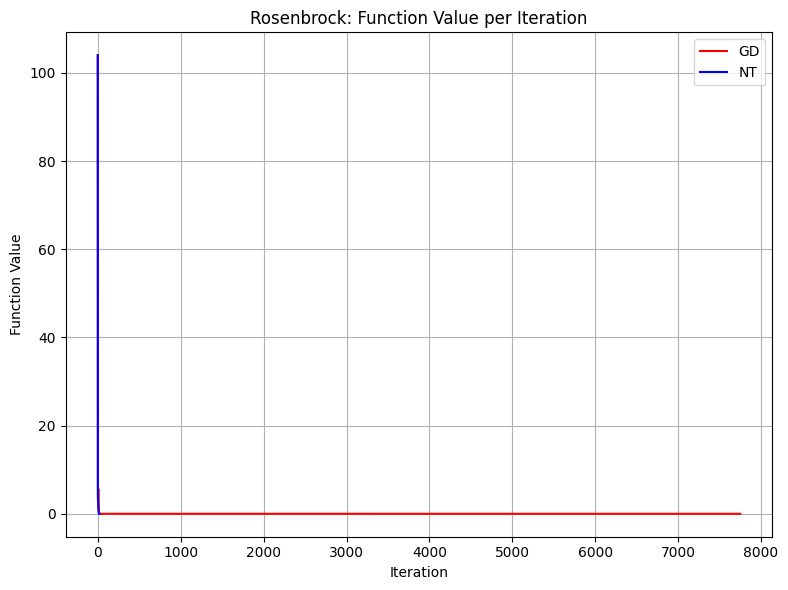

Iter 100: x = [   -99. -12299.], f(x) = -1512876.0
Iter 100: x = [   -99. -12299.], f(x) = -1512876.0


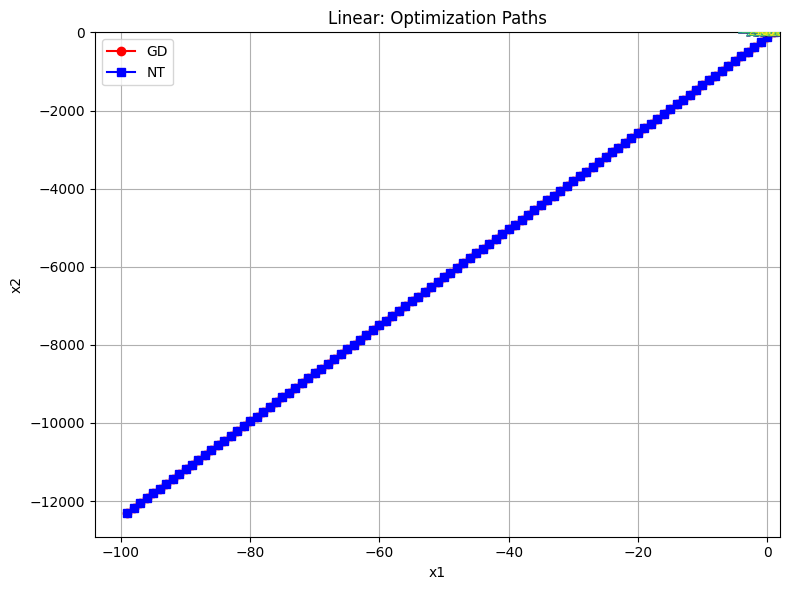

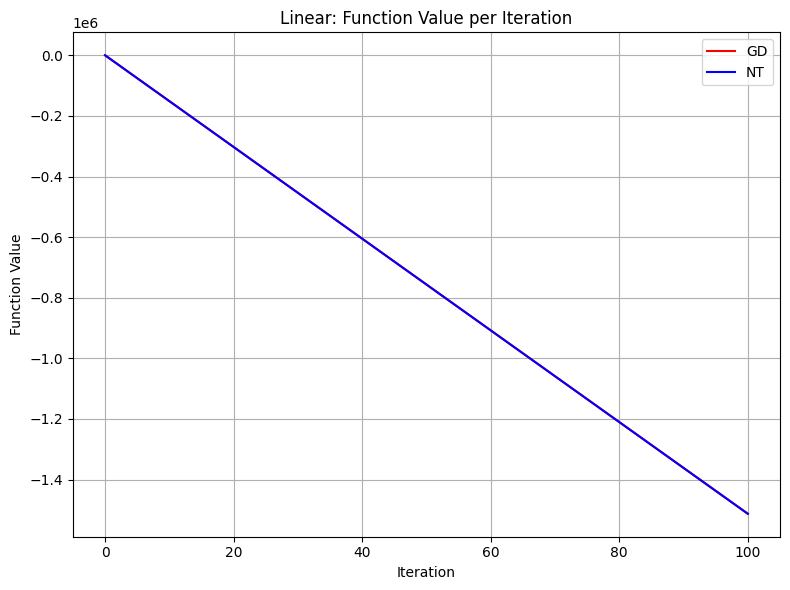

Iter 29: x = [-3.46572886e-01 -9.76799665e-07], f(x) = 2.559266696664345
Iter 9: x = [-3.46573590e-01 -7.26375117e-18], f(x) = 2.5592666966582156


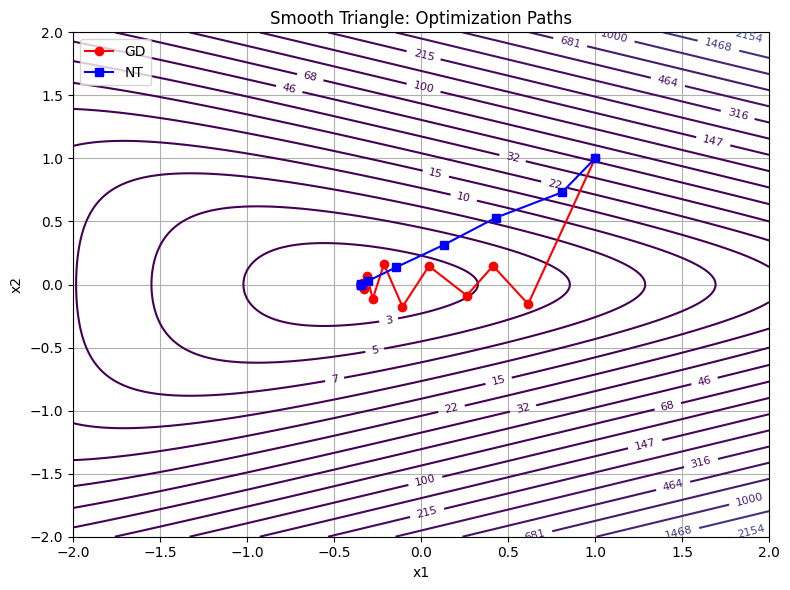

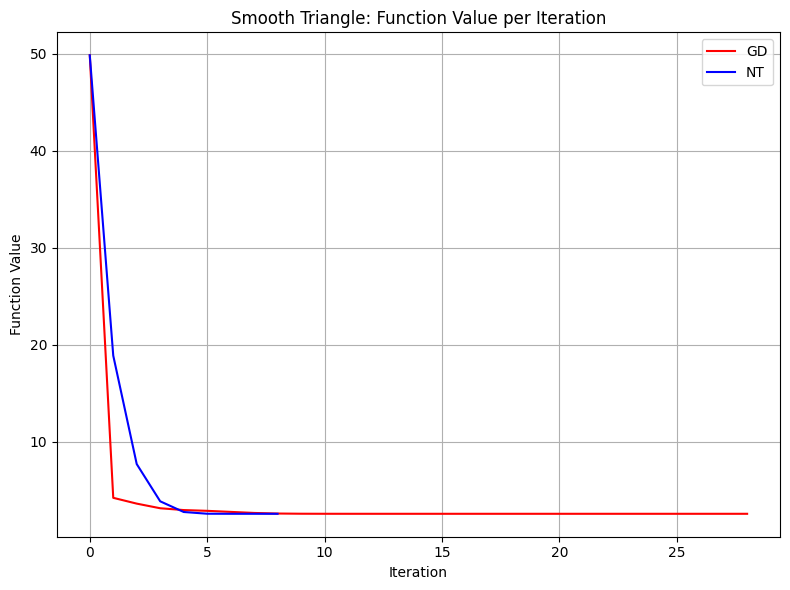

Iter 29: x = [-3.46572886e-01 -9.76799665e-07], f(x) = 2.559266696664345
Iter 9: x = [-3.46573590e-01 -7.26375117e-18], f(x) = 2.5592666966582156


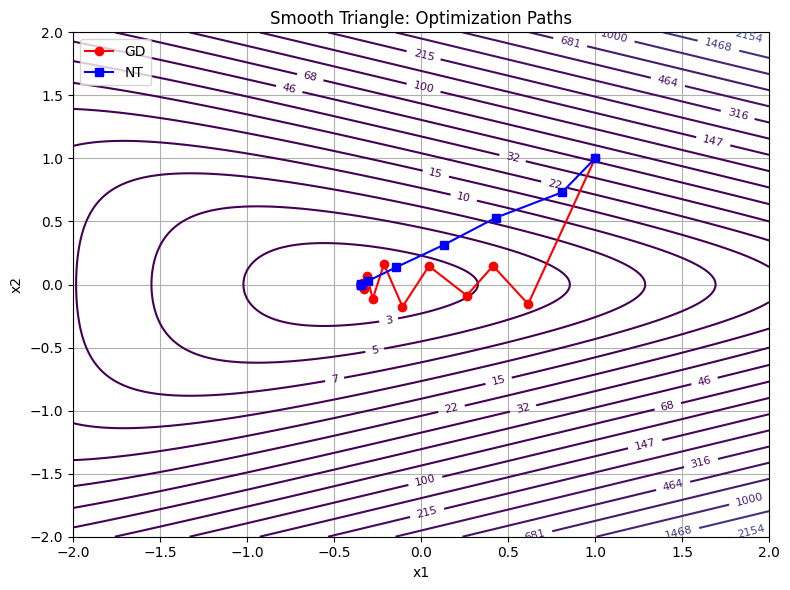

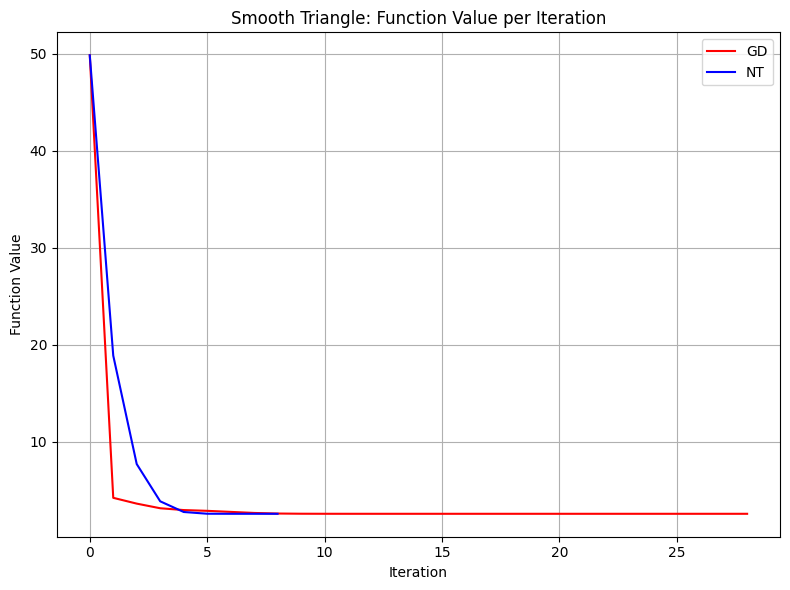

In [23]:
names = ["quad_circle", "quad_ellipse", "quad_rotated_ellipse", "rosenbrock", "linear", "smooth_triangle"]
for name in names:
    func = functions[name]
    settings = plot_settings[name]
    res_gd = minimize(func, [-1.0, 2.0] if name == "rosenbrock" else [1.0, 1.0], method='GD', max_iter=10000 if name == "rosenbrock" else 100)
    res_nt = minimize(func, [-1.0, 2.0] if name == "rosenbrock" else [1.0, 1.0], method='NT')

    plot_contours_with_paths(
        f=func,
        xlim=settings["xlim"],
        ylim=settings["ylim"],
        levels=settings["levels"],
        paths=[res_gd[3], res_nt[3]],
        labels=["GD", "NT"],
        title=f"{name.replace('_', ' ').title()}: Optimization Paths"
    )
    plot_function_values(
        f_paths=[res_gd[4], res_nt[4]],
        labels=["GD", "NT"],
        title=f"{name.replace('_', ' ').title()}: Function Value per Iteration"
    )
func = functions[name]
settings = plot_settings[name]
res_gd = minimize(func, [-1.0, 2.0] if name == "rosenbrock" else [1.0, 1.0], method='GD', max_iter=10000 if name == "rosenbrock" else 100)
res_nt = minimize(func, [-1.0, 2.0] if name == "rosenbrock" else [1.0, 1.0], method='NT')

plot_contours_with_paths(
    f=func,
    xlim=settings["xlim"],
    ylim=settings["ylim"],
    levels=settings["levels"],
    paths=[res_gd[3], res_nt[3]],
    labels=["GD", "NT"],
    title=f"{name.replace('_', ' ').title()}: Optimization Paths"
)
plot_function_values(
    f_paths=[res_gd[4], res_nt[4]],
    labels=["GD", "NT"],
    title=f"{name.replace('_', ' ').title()}: Function Value per Iteration"
)